In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
iris = load_iris()
x = iris.data[50:150,]
le = preprocessing.LabelEncoder()
y = le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size =0.33,random_state=123)
clf = DecisionTreeClassifier()
clf.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
probas_ = clf.fit(train_x,train_y).predict_proba(test_x)
probas_[:,1]

array([0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.])

In [12]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(test_y,probas_[:,1])

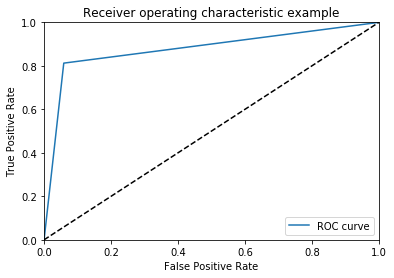

In [17]:
import matplotlib.pylab as plt
plt.plot(fpr,tpr,label = 'ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

## 利用AUC对图像曲线下面的面积进行积分计算

In [19]:
from sklearn.metrics import auc
roc_auc = auc(fpr,tpr)
print('Area under the ROC curve : %f' % roc_auc)

Area under the ROC curve : 0.876838


## 建立不同的模型进行比较

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf1 = DecisionTreeClassifier()
clf1.fit(train_x,train_y)
clf2 = SVC(probability=True)
clf2.fit(train_x,train_y)
clf3 = LogisticRegression()
clf3.fit(train_x,train_y)
clf4 = RandomForestClassifier()
clf4.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 可视化

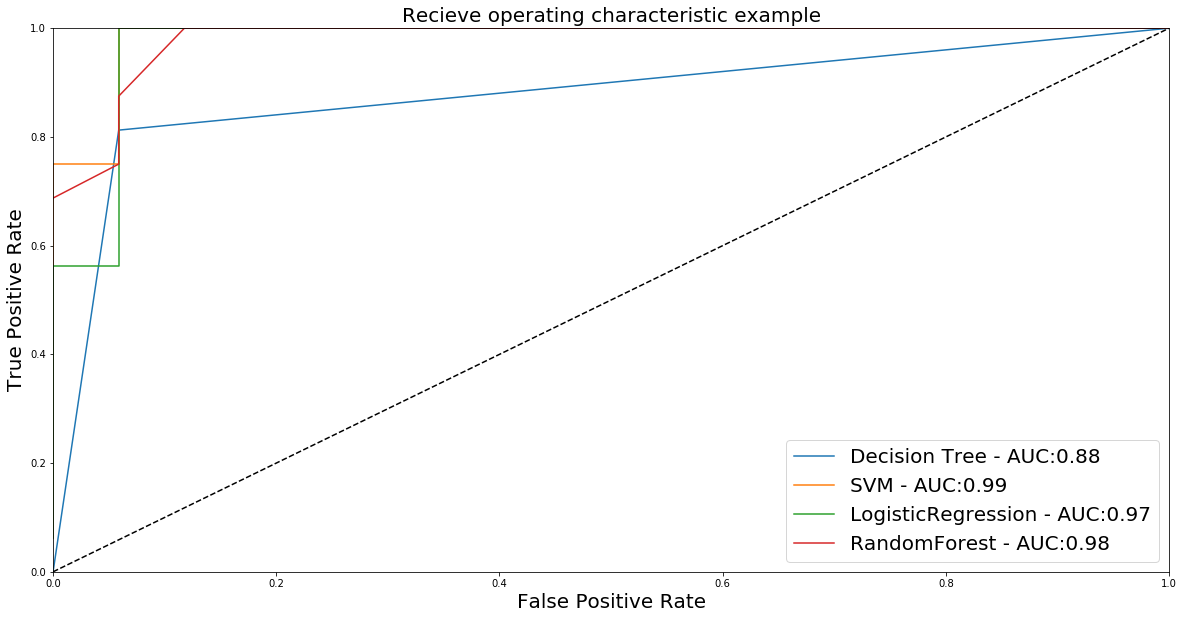

In [35]:
plt.figure(figsize=[20,10])
for clf,title in zip([clf1,clf2,clf3,clf4],['Decision Tree','SVM','LogisticRegression','RandomForest']):
    probas_ = clf.fit(train_x,train_y).predict_proba(test_x)
    fpr,tpr,thresholds = roc_curve(test_y,probas_[:,1])
    plt.plot(fpr,tpr,label='%s - AUC:%.2f' %(title,auc(fpr,tpr)))
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate',fontsize = 20)
plt.ylabel('True Positive Rate',fontsize = 20)
plt.title('Recieve operating characteristic example',fontsize = 20)
plt.legend(loc = 'lower right',fontsize = 20)
plt.show()